<a href="https://colab.research.google.com/github/DmitryiLaptev/Laboratory/blob/master/%D0%9A%D0%BE%D0%BD%D0%B2%D0%BE%D0%BB%D1%8E%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

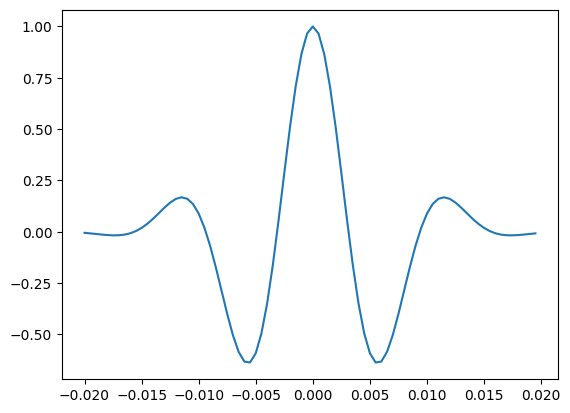

In [ ]:
t = np.arange(-0.02, 0.02, 0.0005)
s = 1 * np.exp(-12500 * t * t) * np.sin(2 * np.pi * 80 * t + (np.pi / 2))
plt.plot(t, s)
#plt.fill_between(t, s, where=s>= 0, color='k')
plt.show()

In [ ]:
df = pd.read_csv('/content/1102_las.csv', sep=';' , encoding='latin-1')

In [ ]:
H = df['H'].values
DT = df['DT'].values
GGKp = df['GGKp'].values

In [ ]:
Vel = 10**6 / DT
Imp = Vel * GGKp
R = np.zeros(len(Imp))
for i in range(len(Imp)-1):
  R[i] = (Imp[i+1] - Imp[i]) / (Imp[i+1] + Imp[i])

In [ ]:
#для визуализации вставляем нули и утраиваем
H1 = np.zeros(len(H)*3)
R1 = np.zeros(len(R)*3)
j = 0
for i in range(len(H)*3):
  H1[i] = H[j]
  if i % 3 == 2 and i != (len(H)*3) :
    j = j + 1
j = 0
for i in range(len(R)*3):
  if i % 3 == 1 and i != (len(H)*3):
    R1[i] = R[j]
    j = j + 1

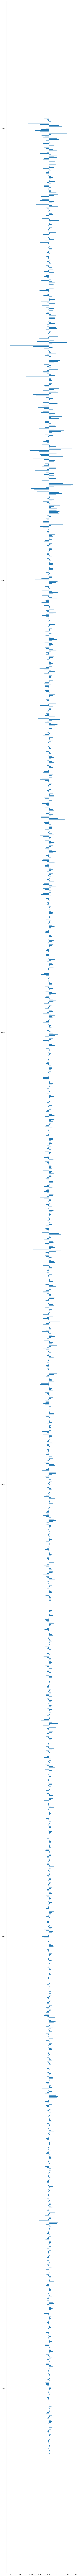

In [ ]:
plt.figure(figsize=(10, 350))
plt.plot(R1, -H1)
plt.show()

In [ ]:
T0 = np.zeros(len(H))
T0[0] = 2 * H[0] / 2500
for i in range(1, len(H)):
  T0[i] = T0[i - 1] + ((H[i] - H[i - 1]) / Vel[i]) * 2

In [ ]:
#для визуализации вставляем нули и утраиваем
T01 = np.zeros(len(T0)*3)
j = 0
for i in range(len(T0)*3):
  T01[i] = T0[j]
  if i % 3 == 2 and i != (len(T0)*3) :
    j = j + 1

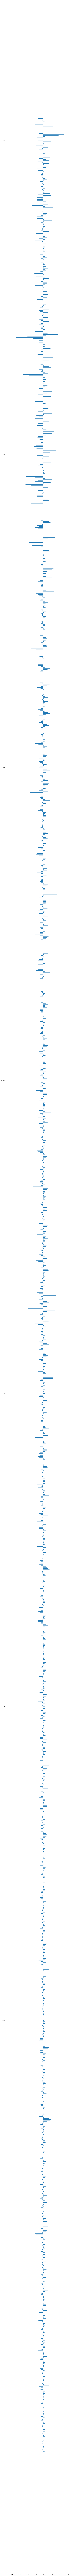

In [ ]:
plt.figure(figsize=(10, 400))
plt.plot(R1, -T01)
plt.show()

In [ ]:
Tr = np.zeros(len(R))
for i in range(len(R)-len(s)):
  x = 0
  for j in range(len(s)):
    x = x + s[j]*R[j+i]
  Tr[i+len(s)//2] = x

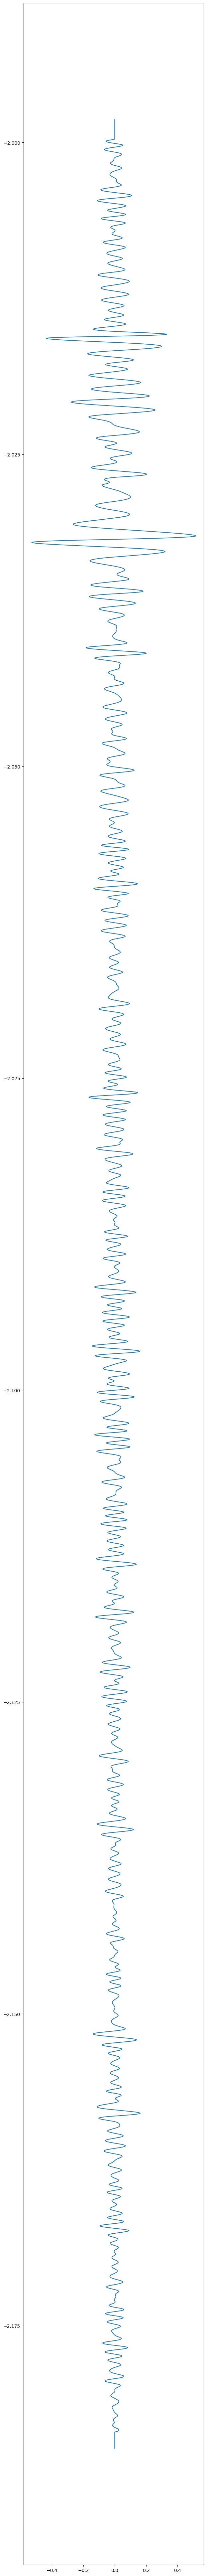

In [ ]:
plt.figure(figsize=(7, 100))
plt.plot(Tr, -T0)
plt.show()

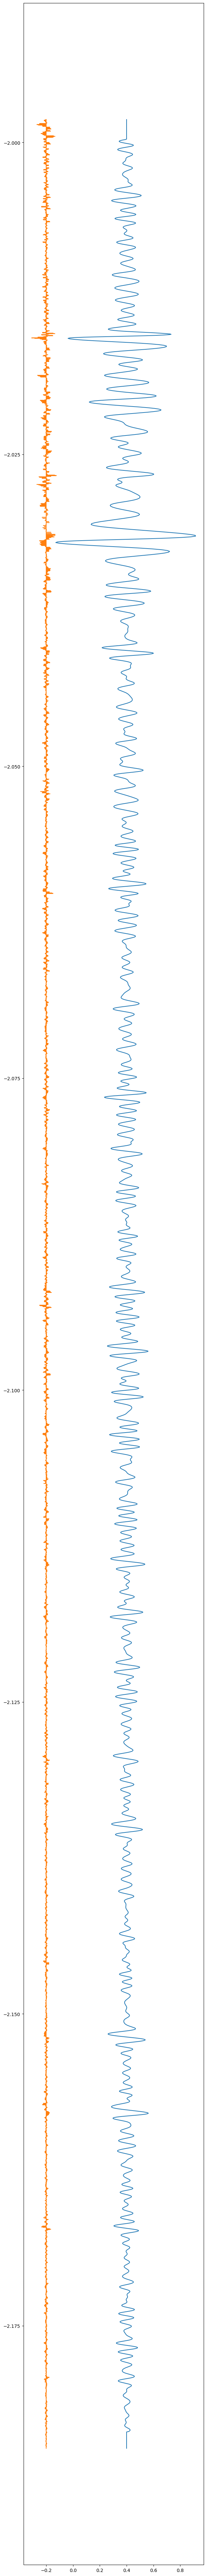

In [ ]:
plt.figure(figsize=(7, 100))
plt.plot(Tr + 0.4, -T0, R1 - 0.2, -T01)
plt.show()

In [ ]:
#МОДЕЛИРОВАНИЕ КЛИНА
#вводим размерность поля глубин и расстояния для автоматическо изменения параметров
raz = 100

In [ ]:
#задаем трехмерный массив данных
#т.к. визуализируется зеркально относительно
#задания матрицы, создаем массив с данными
mas = np.zeros(shape=(raz,raz,2))
for y in range(raz):
  for x in range(raz):
    if y >= 60:
      mas[y][x][0] = 2300
      mas[y][x][1] = 2.3
    if (y < 60) and (y >= 0.5*x + 20):
      mas[y][x][0] = 3000
      mas[y][x][1] = 2.7
    if (y < 60) and (y < 0.5*x + 20):
      mas[y][x][0] = 4000
      mas[y][x][1] = 3.0

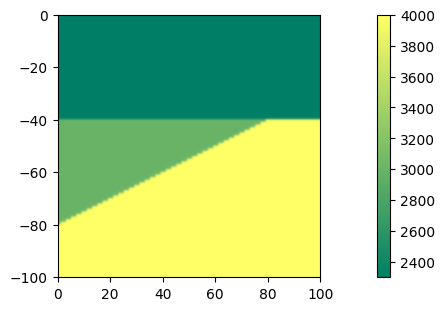

In [ ]:
#визуализация геологической среды
mas1 = np.arange(raz*raz).reshape(raz,raz)
for y in range(raz):
  for x in range(raz):
    mas1[y][x] = mas[y][x][0]
fig, axs = plt.subplots(1, 1, figsize=(10,3), constrained_layout=True)
p2 = axs.imshow(mas1, cmap = 'summer', aspect = 'equal', interpolation = 'gaussian', origin = 'lower', extent = (0, raz, -raz ,0))
fig.colorbar(p2, ax = axs)

In [ ]:
#асчитываем коффициенты снизу вверх (т.к. всё зеркально)
R = np.zeros(shape=(raz,raz))
for j in range(raz - 1):
  for i in range(raz - 1, 0, -1):
    R[i][j] = ((mas[i - 1][j][0] * mas[i - 1][j][1]) - (mas[i][j][0] * mas[i][j][1])) / ((mas[i - 1][j][0] * mas[i - 1][j][1]) + (mas[i][j][0] * mas[i][j][1]))
#for row in R:
#    print(' '.join(str(col) for col in row))

In [ ]:
#пересчет поля глубин в поле времен, идя снизу вверх (т.к. зеркально)
T2 = np.zeros(shape=(raz,raz))
H = np.arange(1, raz + 1, 1)
for j in range(raz - 1):
  for i in range(raz - 2, -1, -1):
    T2[i][j] = T2[i+1][j] + (((H[i+1] - H[i]) / mas[i][j][0]) * 2)

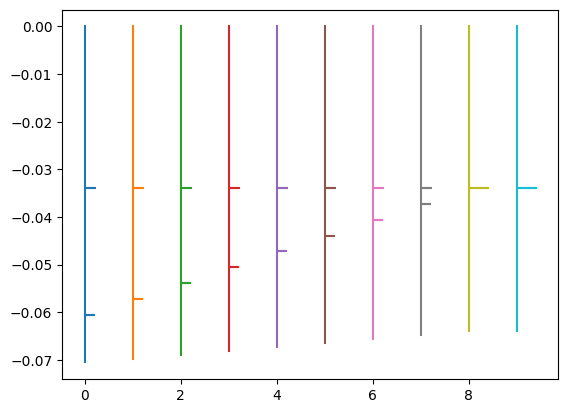

In [ ]:
#Утроение и зануление для визуализации
#Визуализация
A1 = np.zeros(shape=(raz))
T21 = np.zeros(shape=(raz))
for j in range(0, raz, 10):
  for i in range(raz):
    A1[i] = R[i][j]
    T21[i] = T2[i][j]
  t1 = np.zeros(len(T21)*3)
  A2 = np.zeros(len(A1)*3)
  k = 0
  for g in range(len(T21)*3):
   t1[g] = T21[k]
   if g % 3 == 2 and g != (len(T21)*3) :
      k = k + 1
  k = 0
  for g in range(len(A1)*3):
   if g % 3 == 1 and g != (len(T21)*3):
     A2[g] = A1[k]
     k = k + 1
  plt.plot(A2 + j // 10, -t1)
plt.show()

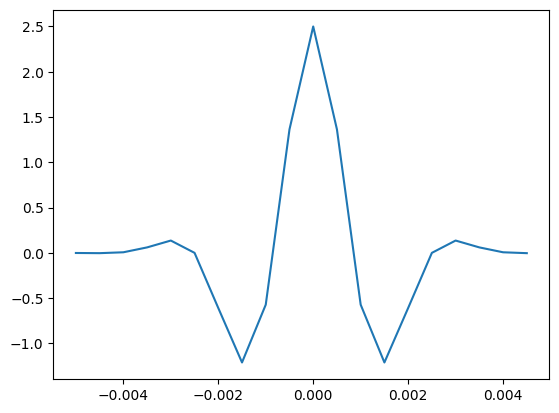

In [ ]:
t = np.arange(-0.005, 0.005, 0.0005)
s = 2.5 * np.exp(-300000 * t * t) * np.sin(2 * np.pi * 300 * t + (np.pi / 2))
plt.plot(t, s)

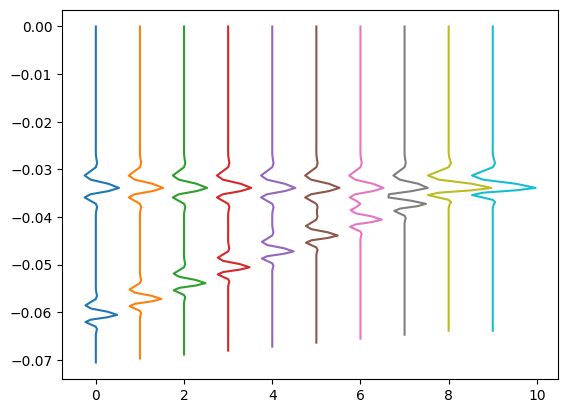

In [ ]:
for i in range(0, raz, 10):
  for j in range(raz):
    A1[j] = R[j][i]
    T21[j] = T2[j][i]
  Tr = np.zeros(len(A1))
  for g in range(len(A1)-len(s)):
    x = 0
    for k in range(len(s)):
      x = x + s[k]*A1[k+g]
    Tr[g+len(s)//2] = x
  plt.plot(Tr + i // 10, -T21)
plt.show()

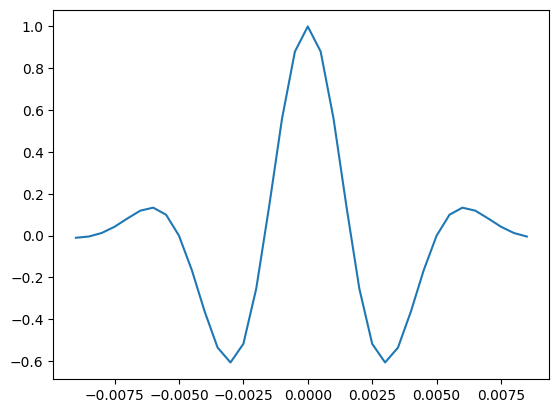

In [ ]:
t = np.arange(-0.009, 0.009, 0.0005)
s = 1 * np.exp(-50000 * t * t) * np.sin(2 * np.pi * 150 * t + (np.pi / 2))
plt.plot(t, s)

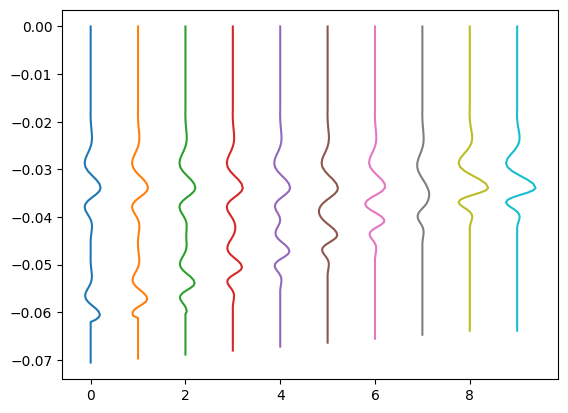

In [ ]:
for i in range(0, raz, 10):
  for j in range(raz):
    A1[j] = R[j][i]
    T21[j] = T2[j][i]
  Tr = np.zeros(len(A1))
  for g in range(len(A1)-len(s)):
    x = 0
    for k in range(len(s)):
      x = x + s[k]*A1[k+g]
    Tr[g+len(s)//2] = x
  plt.plot(Tr + i // 10, -T21)
plt.show()

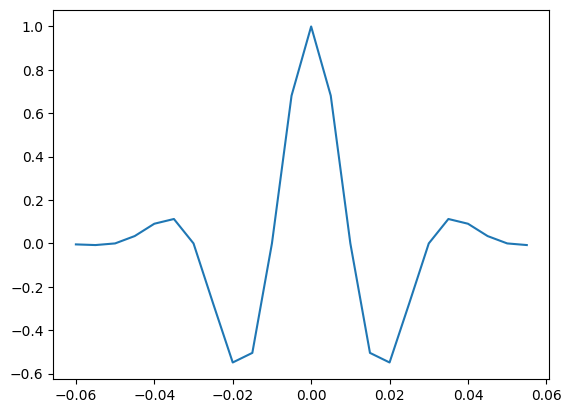

In [ ]:
t = np.arange(-0.06, 0.06, 0.005)
s = 1 * np.exp(-1500 * t * t) * np.sin(2 * np.pi * 25 * t + (np.pi / 2))
plt.plot(t, s)

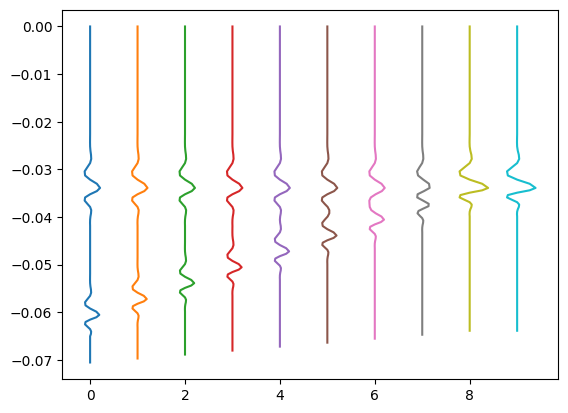

In [ ]:
for i in range(0, raz, 10):
  for j in range(raz):
    A1[j] = R[j][i]
    T21[j] = T2[j][i]
  Tr = np.zeros(len(A1))
  for g in range(len(A1)-len(s)):
    x = 0
    for k in range(len(s)):
      x = x + s[k]*A1[k+g]
    Tr[g+len(s)//2] = x
  plt.plot(Tr + i // 10, -T21)
plt.show()

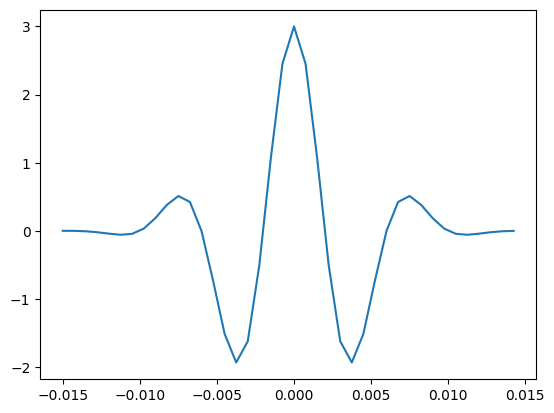

In [ ]:
t = np.arange(-0.015, 0.015, 0.00075)
s = 3 * np.exp(-30000 * t * t) * np.sin(2 * np.pi * 125 * t + (np.pi / 2))
plt.plot(t, s)

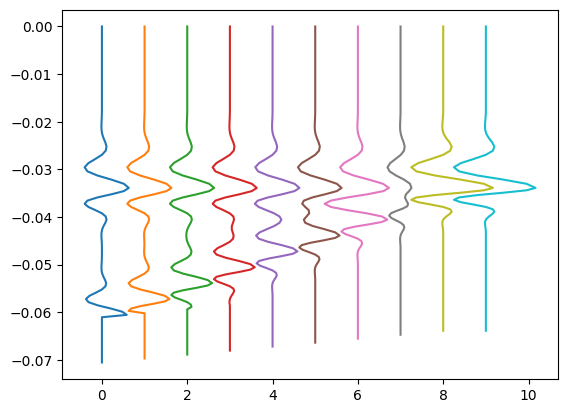

In [ ]:
for i in range(0, raz, 10):
  for j in range(raz):
    A1[j] = R[j][i]
    T21[j] = T2[j][i]
  Tr = np.zeros(len(A1))
  for g in range(len(A1)-len(s)):
    x = 0
    for k in range(len(s)):
      x = x + s[k]*A1[k+g]
    Tr[g+len(s)//2] = x
  plt.plot(Tr + i // 10, -T21)
plt.show()

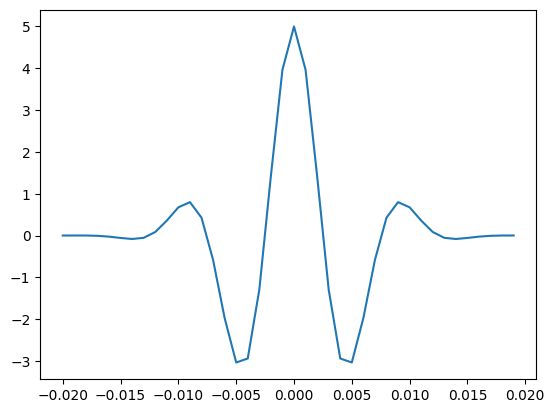

In [ ]:
t = np.arange(-0.02, 0.02, 0.001)
s = 5 * np.exp(-20000 * t * t) * np.sin(2 * np.pi * 100 * t + (np.pi / 2))
plt.plot(t, s)

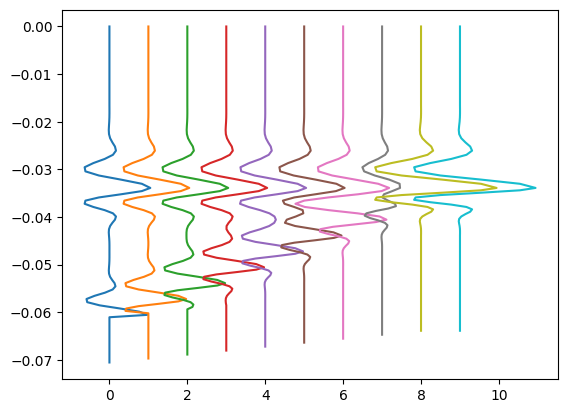

In [ ]:
for i in range(0, raz, 10):
  for j in range(raz):
    A1[j] = R[j][i]
    T21[j] = T2[j][i]
  Tr = np.zeros(len(A1))
  for g in range(len(A1)-len(s)):
    x = 0
    for k in range(len(s)):
      x = x + s[k]*A1[k+g]
    Tr[g+len(s)//2] = x
  plt.plot(Tr + i // 10, -T21)
plt.show()

In [ ]:
scale = 25

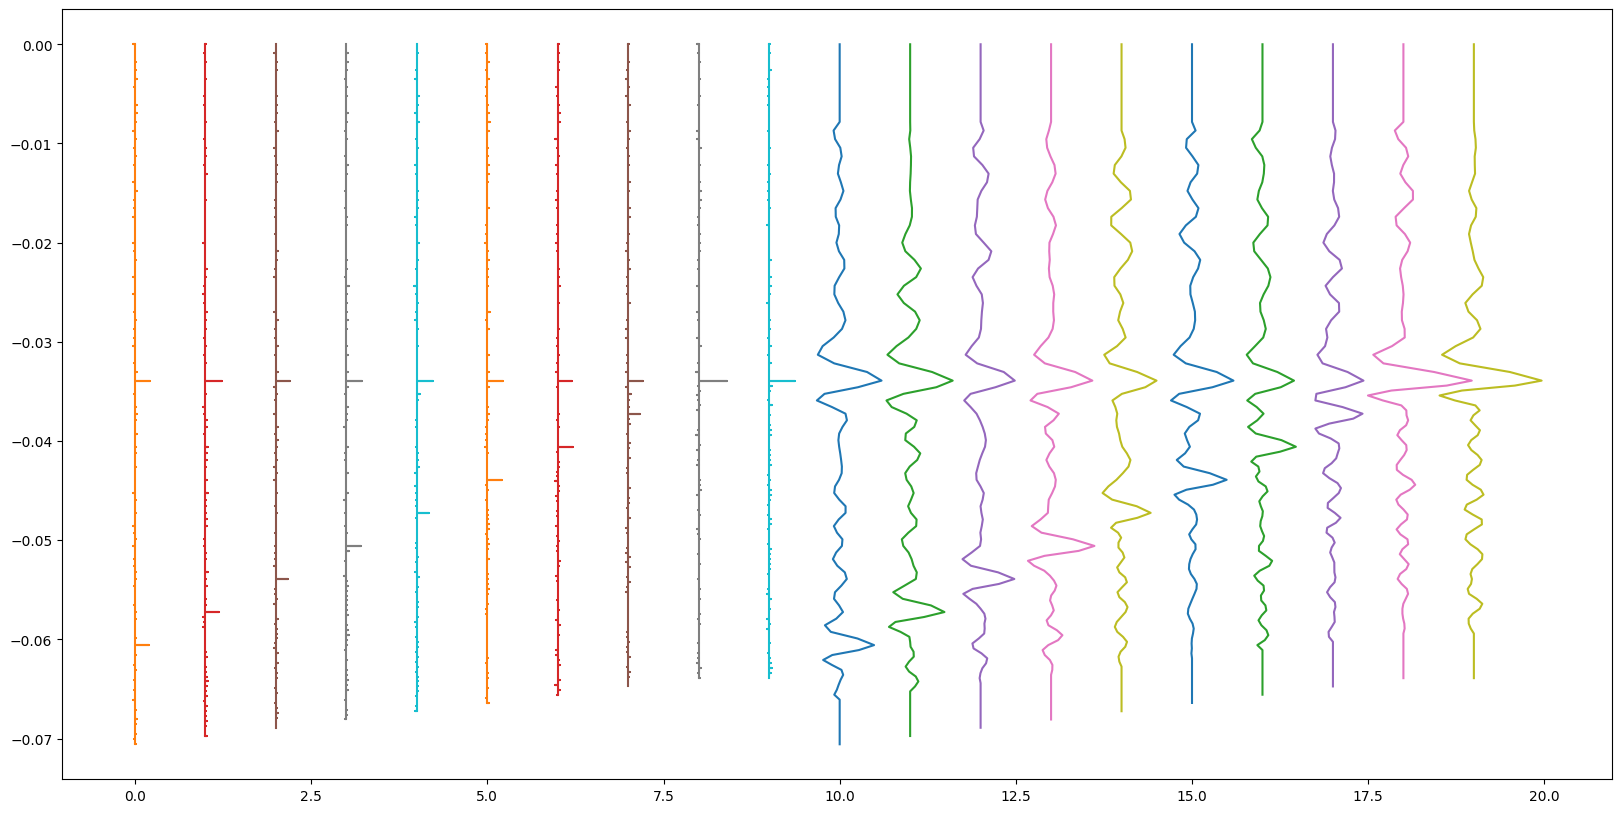

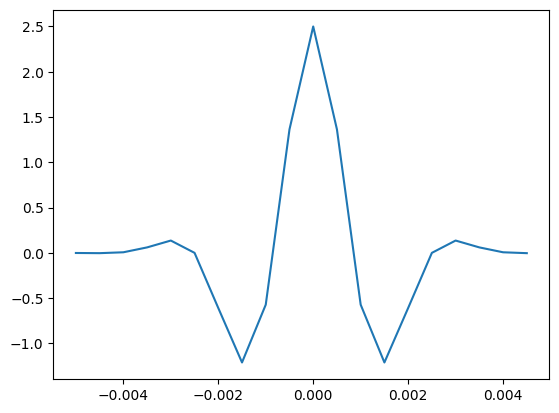

In [ ]:
#добавляем шумы
plt.figure(figsize=(20, 10))
A1 = np.zeros(shape=(raz))
for i in range(0, raz, 10):
  for j in range(raz):
    A1[j] = R[j][i] + (random.random() / scale) + (random.random() / (-scale))
    T21[j] = T2[j][i]
  t1 = np.zeros(len(T21)*3)
  A2 = np.zeros(len(A1)*3)
  Tr = np.zeros(len(A1))
  for g in range(len(A1)-len(s)):
    x = 0
    for k in range(len(s)):
      x = x + s[k]*A1[k+g]
    Tr[g+len(s)//2] = x
  plt.plot(Tr + (i // 10) + 10, -T21)
  k = 0
  for g in range(len(T21)*3):
   t1[g] = T21[k]
   if g % 3 == 2 and g != (len(T21)*3) :
      k = k + 1
  k = 0
  for g in range(len(A1)*3):
   if g % 3 == 1 and g != (len(T21)*3):
     A2[g] = A1[k]
     k = k + 1
  plt.plot(A2 + (i // 10), -t1)
plt.show()

t = np.arange(-0.005, 0.005, 0.0005)
s = 2.5 * np.exp(-300000 * t * t) * np.sin(2 * np.pi * 300 * t + (np.pi / 2))
plt.plot(t, s)
# plt.show()